# Photon Emission Protocol — Square Graph

Solve the photon-emission protocol for a **square (cycle) graph** with $n = 4$ vertices.

The four vertices are connected in a ring: $1\!-\!2\!-\!3\!-\!4\!-\!1$.

In [1]:
import numpy as np

from emission import (
    StabilizerState,
    circuit_solver,
    protocol_executor,
    generators_equivalence,
    operation_to_quantikz,
    compile_quantikz_pdf,
    plot_graph,
    plot_height_function,
)

In [2]:
def run_example(n, edges, filename):
    """Full pipeline: plot, solve, verify, quantikz+PDF, display circuit, height function."""
    Gamma = np.zeros((n, n), dtype=np.int8)
    for i, j in edges:
        Gamma[i, j] = 1
        Gamma[j, i] = 1

    plot_graph(n, edges, title=f'{filename}  (n = {n})')

    gen = StabilizerState(np.eye(n, dtype=np.int8), Gamma, np.zeros(n, dtype=np.int8))
    op, inv_op, stat = circuit_solver(gen)
    print(f'  Photons: {stat["PhotonsNumber"]}, Emitters: {stat["EmittersNumber"]}')

    _, g_phi = protocol_executor(inv_op, stat['EmittersNumber'], stat['PhotonsNumber'])
    print('  Equivalence:', generators_equivalence(gen, g_phi))

    operation_to_quantikz(op, stat['PhotonsNumber'], stat['EmittersNumber'], filename)
    compile_quantikz_pdf(filename)

    plot_height_function(stat['HeightFunc'], title=f'{filename} — height function')
    print(f'  Height function h = {stat["HeightFunc"]}')
    return stat

## Square graph ($n = 4$)

Four vertices connected in a cycle: $1\!-\!2\!-\!3\!-\!4\!-\!1$.

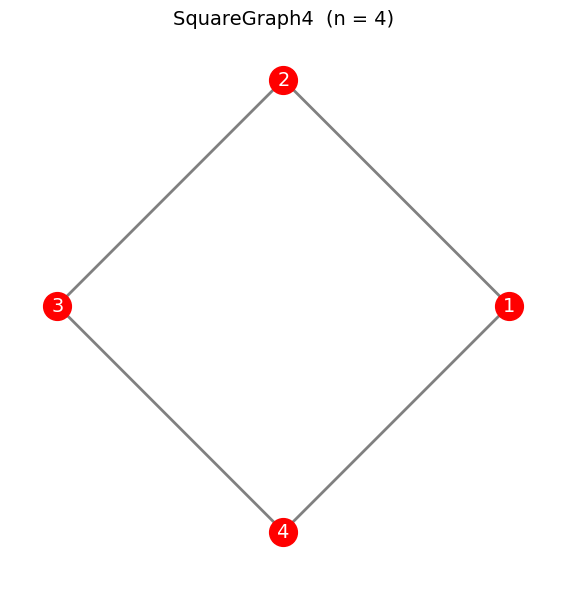

	** The protocol is SOLVED correctly! **
  Photons: 4, Emitters: 2
  Equivalence: {'Overall': True, 'Tableau': True, 'SignVector': True}
	** The quantikz code for latex has been saved as: quantikz_SquareGraph4.txt **
	** PDF compiled: quantikz_SquareGraph4.pdf **


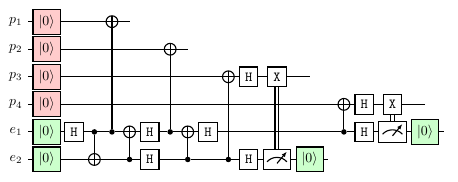

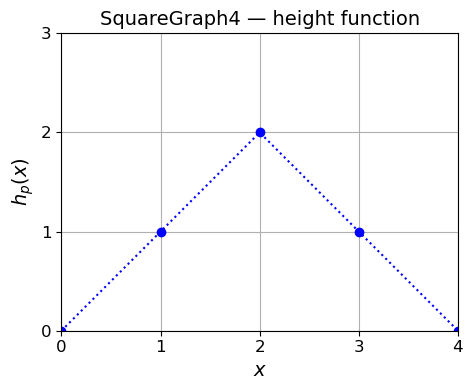

  Height function h = [0 1 2 1 0]


In [3]:
n = 4
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
stat = run_example(n, edges, 'SquareGraph4')

## Square graph with emission ordering 1-3-2-4

Same square graph, but the qubits are re-ordered so that the emission
sequence is $1 \to 3 \to 2 \to 4$ (0-indexed permutation `[0, 2, 1, 3]`).
This changes the adjacency matrix and therefore the height function.

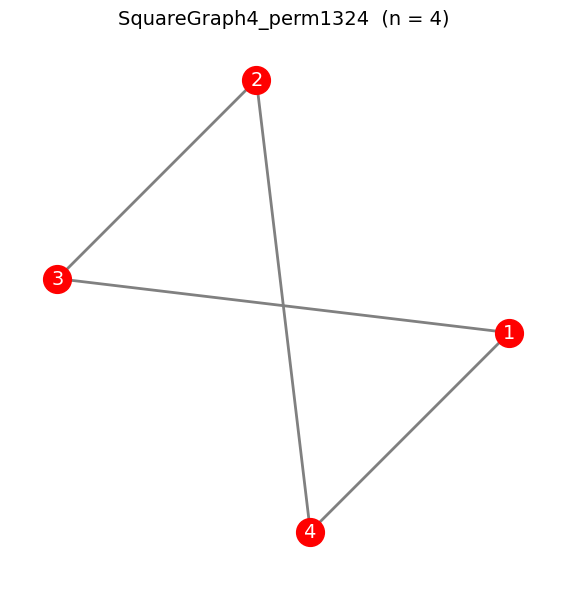

	** The protocol is SOLVED correctly! **
  Photons: 4, Emitters: 1
  Equivalence: {'Overall': True, 'Tableau': True, 'SignVector': True}
	** The quantikz code for latex has been saved as: quantikz_SquareGraph4_perm1324.txt **
	** PDF compiled: quantikz_SquareGraph4_perm1324.pdf **


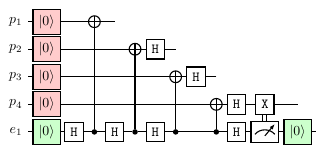

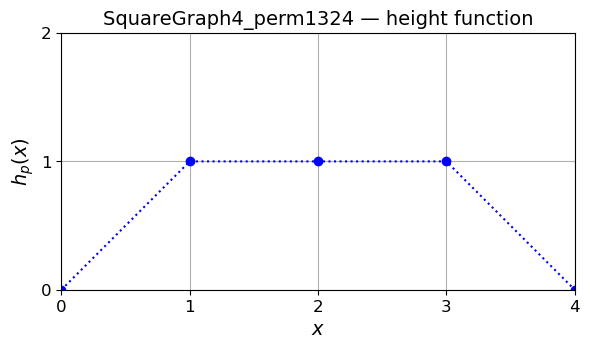

  Height function h = [0 1 1 1 0]


In [4]:
# Build the original adjacency matrix
Gamma = np.zeros((n, n), dtype=np.int8)
for i, j in edges:
    Gamma[i, j] = 1
    Gamma[j, i] = 1

# Emission ordering 1-3-2-4  (0-indexed: [0, 2, 1, 3])
perm = np.array([0, 2, 1, 3])
Gamma_perm = Gamma[np.ix_(perm, perm)]

# Derive edge list from the permuted adjacency matrix
edges_perm = [(i, j) for i in range(n) for j in range(i + 1, n) if Gamma_perm[i, j]]

stat_perm = run_example(n, edges_perm, 'SquareGraph4_perm1324')